In [1]:
# import statements
import pandas as pd
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import matplotlib

In [145]:
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway

In [2]:
# DO NOT run this cell twice or it will override all the data preprocessing
# reads in each sheet of data
data_google = Table().read_table("google.csv").drop('Headline','Article','Unnamed: 11','Need Review: LOWDATA entries that are not videos, BADLINK entries, CONSENT entries')
data_yahoo = Table().read_table("yahoo.csv").drop('Headline','Article')
data_apple = Table().read_table("apple.csv").drop('Top Stories','Article','Unnamed: 10','Factual Reporting','Unnamed: 12','(probably not needed)')
data_interactive_mb = Table().read_table("interactive_mb.csv")

# DATA PREPROCESSING

In [4]:
# adding interactive MB values for Google news
reliability_range = []
bias_range = []
audience = []
for i in range(data_google.num_rows): # for loop iterates through each google row
    publication = data_google.column(0).item(i)
    bool = False
    for k in range(data_interactive_mb.num_rows): # for loop iterates through each interactive MB source
        if (publication == data_interactive_mb.column(0).item(k)):
            reliability_range.append(data_interactive_mb.column(1).item(k))
            bias_range.append(data_interactive_mb.column(2).item(k))
            audience.append(data_interactive_mb.column(3).item(k))
            bool = True
    if bool == False:
        reliability_range.append(np.nan) # nan for values not listed
        bias_range.append(np.nan) # nan for values not listed
        audience.append(np.nan) # nan for values not listed

data_google = data_google.drop('Reliability Range (Interactive MB)','Bias Range (Interactive MB)','Audience (Interactive MB)').with_columns('Reliability Range',reliability_range,
                                                                                                                             'Bias Range',bias_range,
                                                                                                                             'Audience',audience)
# adding interactive MB values for Yahoo news
reliability_range = []
bias_range = []
audience = []
for i in range(data_yahoo.num_rows): # for loop iterates through each yahoo row
    publication = data_yahoo.column(0).item(i)
    bool = False
    for k in range(data_interactive_mb.num_rows): # for loop iterates through each interactive MB source
        if (publication == data_interactive_mb.column(0).item(k)):
            reliability_range.append(data_interactive_mb.column(1).item(k))
            bias_range.append(data_interactive_mb.column(2).item(k))
            audience.append(data_interactive_mb.column(3).item(k))
            bool = True
    if bool == False:
        reliability_range.append(np.nan) # nan for values not listed
        bias_range.append(np.nan) # nan for values not listed
        audience.append(np.nan) # nan for values not listed

data_yahoo = data_yahoo.drop('Reliability Range (Interactive MB)','Bias Range (Interactive MB)','Audience (Interactive MB)').with_columns('Reliability Range',reliability_range,
                                                                                                                             'Bias Range',bias_range,
                                                                                                                             'Audience',audience)
# adding interactive MB values for Apple news
reliability_range = []
bias_range = []
audience = []
for i in range(data_apple.num_rows): # for loop iterates through each apple row
    publication = data_apple.column('Publication').item(i)
    bool = False
    for k in range(data_interactive_mb.num_rows): # for loop iterates through each interactive MB source
        if (publication == data_interactive_mb.column(0).item(k)):
            reliability_range.append(data_interactive_mb.column(1).item(k))
            bias_range.append(data_interactive_mb.column(2).item(k))
            audience.append(data_interactive_mb.column(3).item(k))
            bool = True
    if bool == False:
        reliability_range.append(np.nan) # nan for values not listed
        bias_range.append(np.nan) # nan for values not listed
        audience.append(np.nan) # nan for values not listed

data_apple = data_apple.drop('Reliability Range (Interactive MB)','Bias Range (Interactive MB)','Audience (Interactive MB)').with_columns('Reliability Range',reliability_range,
                                                                                                                             'Bias Range',bias_range,
                                                                                                                             'Audience',audience)
data_apple

Headline,Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 hours?,Bipartisan Press Bias,Reliability Range,Bias Range,Audience
Voting bills advance in Texas Legislature after overnigh ...,The Texas Tribune,Left-Center,1,"July 11, 2021",nan,-4.390746,nan,nan,nan
What Virgin Galactic's milestone flight means for the fu ...,National Geographic,Pro-Science,2,"July 11, 2021",nan,-1.623991,46.11,-2.58,nan
"It's two steps forward, 10 steps back:' Brexit, shifting ...",CNN,Left,3,"July 11, 2021",nan,-6.067039,43.77,-8.78,"79,900,000"
Italy beat England in shootout to win 2020 European Cham ...,ESPN,Left-Center,4,"July 11, 2021",nan,2.060121,nan,nan,nan
Heat wave keeps baking West after all-time high in Las V ...,The Washington Post,Left-Center,5,"July 11, 2021",nan,-0.803729,44.05,-7.42,"76,195,000"
Death toll rises to 90 in Surfside condominium collapse. ...,Miami Herald,Left-Center,6,"July 11, 2021",nan,UNK,46.7,-3.86,nan
They will never let go': Isis fighters regroup in the he ...,The Guardian,Left-Center,7,"July 11, 2021",nan,-0.296883,44.42,-9.93,"88,750,000"
Fencing around U.S. Capitol removed six months after dea ...,REUTERS,Neutral,8,"July 11, 2021",nan,1.105257,49.3,-1.65,"40,574,000"
Richard Branson's Virgin Galactic Flight Opens Door to S ...,REUTERS,Neutral,9,"July 11, 2021",nan,1.017142,49.3,-1.65,"40,574,000"
Novak Djokovic wins Wimbledon to claim record-tying 20th ...,ESPN,Left-Center,10,"July 11, 2021",nan,0.057179,nan,nan,nan


In [5]:
# replacing 'MB/FC Slant' values with numbers from 1-5
# Left - 1, Left-Center - 2, Pro-Science - 2, Neutral - 3, Unknown - 3, nan - 3, Right-Center - 4, Right - 5

# replacing Google's values
new_slants = []
for i in data_google.column('MB/FC Slant'):
    if (i == 'Left'):
        new_slants.append(1)
    elif (i == 'Left-Center'):
        new_slants.append(2)
    elif (i == 'Neutral'):
        new_slants.append(3)
    elif (i == 'Right-Center'):
        new_slants.append(4)
    elif (i == 'Right'):
        new_slants.append(5)
    else:
        new_slants.append(3)
data_google = data_google.with_column('New MB/FC Slant',new_slants)

# replacing Yahoo's values
new_slants = []
for i in data_yahoo.column('MB/FC Slant'):
    if (i == 'Left'):
        new_slants.append(1)
    elif (i == 'Left-Center'):
        new_slants.append(2)
    elif (i == 'Neutral'):
        new_slants.append(3)
    elif (i == 'Right-Center'):
        new_slants.append(4)
    elif (i == 'Right'):
        new_slants.append(5)
    else:
        new_slants.append(3)
data_yahoo = data_yahoo.with_column('New MB/FC Slant',new_slants)

# replacing Apple's values
new_slants = []
for i in data_apple.column('MB/FC Slant'):
    if (i == 'Left'):
        new_slants.append(1)
    elif (i == 'Left-Center'):
        new_slants.append(2)
    elif (i == 'Neutral'):
        new_slants.append(3)
    elif (i == 'Right-Center'):
        new_slants.append(4)
    elif (i == 'Right'):
        new_slants.append(5)
    else:
        new_slants.append(3)
data_apple = data_apple.with_column('New MB/FC Slant',new_slants)
data_apple

Headline,Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 hours?,Bipartisan Press Bias,Reliability Range,Bias Range,Audience,New MB/FC Slant
Voting bills advance in Texas Legislature after overnigh ...,The Texas Tribune,Left-Center,1,"July 11, 2021",nan,-4.390746,nan,nan,nan,2
What Virgin Galactic's milestone flight means for the fu ...,National Geographic,Pro-Science,2,"July 11, 2021",nan,-1.623991,46.11,-2.58,nan,3
"It's two steps forward, 10 steps back:' Brexit, shifting ...",CNN,Left,3,"July 11, 2021",nan,-6.067039,43.77,-8.78,"79,900,000",1
Italy beat England in shootout to win 2020 European Cham ...,ESPN,Left-Center,4,"July 11, 2021",nan,2.060121,nan,nan,nan,2
Heat wave keeps baking West after all-time high in Las V ...,The Washington Post,Left-Center,5,"July 11, 2021",nan,-0.803729,44.05,-7.42,"76,195,000",2
Death toll rises to 90 in Surfside condominium collapse. ...,Miami Herald,Left-Center,6,"July 11, 2021",nan,UNK,46.7,-3.86,nan,2
They will never let go': Isis fighters regroup in the he ...,The Guardian,Left-Center,7,"July 11, 2021",nan,-0.296883,44.42,-9.93,"88,750,000",2
Fencing around U.S. Capitol removed six months after dea ...,REUTERS,Neutral,8,"July 11, 2021",nan,1.105257,49.3,-1.65,"40,574,000",3
Richard Branson's Virgin Galactic Flight Opens Door to S ...,REUTERS,Neutral,9,"July 11, 2021",nan,1.017142,49.3,-1.65,"40,574,000",3
Novak Djokovic wins Wimbledon to claim record-tying 20th ...,ESPN,Left-Center,10,"July 11, 2021",nan,0.057179,nan,nan,nan,2


In [6]:
# getting rid of non-number bipartisan press bias values
data_google = data_google.where('Bipartisan Press Bias',are.not_equal_to('LOWDATA')).where('Bipartisan Press Bias',are.not_equal_to('UNK')).where('Bipartisan Press Bias',are.not_equal_to('BADLINK'))
data_yahoo = data_yahoo.where('Bipartisan Press Bias',are.not_equal_to('LOWDATA')).where('Bipartisan Press Bias',are.not_equal_to('UNK')).where('Bipartisan Press Bias',are.not_equal_to('BADLINK')).where('Bipartisan Press Bias',are.not_equal_to('ERROR'))
data_apple = data_apple.where('Bipartisan Press Bias',are.not_equal_to('LOWDATA')).where('Bipartisan Press Bias',are.not_equal_to('UNK')).where('Bipartisan Press Bias',are.not_equal_to('BADLINK')).where('Bipartisan Press Bias',are.not_equal_to('CONSENT'))

In [12]:
# converting float bipartisan press biases to integers
data_google = data_google.with_column('Bipartisan Press Bias (float)',data_google.column('Bipartisan Press Bias').astype(np.float))
data_yahoo = data_yahoo.with_column('Bipartisan Press Bias (float)',data_yahoo.column('Bipartisan Press Bias').astype(np.float))
data_apple = data_apple.with_column('Bipartisan Press Bias (float)',data_apple.column('Bipartisan Press Bias').astype(np.float))

In [31]:
# giving bias score from 1-5 based on bipartisan press

new_bias = []
for i in np.arange(data_google.num_rows):
    bp_bias = data_google.column('Bipartisan Press Bias (float)').item(i)
    if(bp_bias >= 25.2):
        new_bias.append(5)
    elif(bp_bias >= 8.4):
        new_bias.append(4)
    elif(bp_bias >= -8.4):
        new_bias.append(3)
    elif(bp_bias >= -25.2):
        new_bias.append(2)
    elif(bp_bias < -25.2):
        new_bias.append(1)
    else:
        new_bias.append(0)
data_google = data_google.with_column('Bipartisan Press Slant',new_bias)

new_bias = []
for i in np.arange(data_yahoo.num_rows):
    bp_bias = data_yahoo.column('Bipartisan Press Bias (float)').item(i)
    if(bp_bias >= 25.2):
        new_bias.append(5)
    elif(bp_bias >= 8.4):
        new_bias.append(4)
    elif(bp_bias >= -8.4):
        new_bias.append(3)
    elif(bp_bias >= -25.2):
        new_bias.append(2)
    elif(bp_bias < -25.2):
        new_bias.append(1)
    else:
        new_bias.append(0)
data_yahoo = data_yahoo.with_column('Bipartisan Press Slant',new_bias)

new_bias = []
for i in np.arange(data_apple.num_rows):
    bp_bias = data_apple.column('Bipartisan Press Bias (float)').item(i)
    if(bp_bias >= 25.2):
        new_bias.append(5)
    elif(bp_bias >= 8.4):
        new_bias.append(4)
    elif(bp_bias >= -8.4):
        new_bias.append(3)
    elif(bp_bias >= -25.2):
        new_bias.append(2)
    elif(bp_bias < -25.2):
        new_bias.append(1)
    else:
        new_bias.append(0)
data_apple = data_apple.with_column('Bipartisan Press Slant',new_bias)
data_apple

Headline,Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 hours?,Bipartisan Press Bias,Reliability Range,Bias Range,Audience,New MB/FC Slant,Bipartisan Press Bias (float),Bipartisan Press Slant
Voting bills advance in Texas Legislature after overnigh ...,The Texas Tribune,Left-Center,1,"July 11, 2021",nan,-4.390746,nan,nan,nan,2,-4.39075,3
What Virgin Galactic's milestone flight means for the fu ...,National Geographic,Pro-Science,2,"July 11, 2021",nan,-1.623991,46.11,-2.58,nan,3,-1.62399,3
"It's two steps forward, 10 steps back:' Brexit, shifting ...",CNN,Left,3,"July 11, 2021",nan,-6.067039,43.77,-8.78,"79,900,000",1,-6.06704,3
Italy beat England in shootout to win 2020 European Cham ...,ESPN,Left-Center,4,"July 11, 2021",nan,2.060121,nan,nan,nan,2,2.06012,3
Heat wave keeps baking West after all-time high in Las V ...,The Washington Post,Left-Center,5,"July 11, 2021",nan,-0.803729,44.05,-7.42,"76,195,000",2,-0.803729,3
They will never let go': Isis fighters regroup in the he ...,The Guardian,Left-Center,7,"July 11, 2021",nan,-0.296883,44.42,-9.93,"88,750,000",2,-0.296883,3
Fencing around U.S. Capitol removed six months after dea ...,REUTERS,Neutral,8,"July 11, 2021",nan,1.105257,49.3,-1.65,"40,574,000",3,1.10526,3
Richard Branson's Virgin Galactic Flight Opens Door to S ...,REUTERS,Neutral,9,"July 11, 2021",nan,1.017142,49.3,-1.65,"40,574,000",3,1.01714,3
Novak Djokovic wins Wimbledon to claim record-tying 20th ...,ESPN,Left-Center,10,"July 11, 2021",nan,0.057179,nan,nan,nan,2,0.057179,3
"Novak Djokovic wins 20th Grand Slam at Wimbledon, ties m ...",USA Today,Left-Center,11,"July 11, 2021",nan,-0.411525,nan,nan,nan,2,-0.411525,3


# ALL TABLES

In [32]:
data_google.show()

Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 Hours?,Bipartisan Press Bias,Reliability Range,Bias Range,Audience,New MB/FC Slant,Bipartisan Press Bias (float),Bipartisan Press Slant
The Hill,Neutral,1,"July 11, 2021",True,-1.083446,44.99,-0.38,"24,400,000",3,-1.08345,3
CNN,Left,2,"July 11, 2021",True,-9.456939,43.77,-8.78,"79,900,000",1,-9.45694,2
Yahoo News,Left,3,"July 11, 2021",True,-7.042858,nan,nan,nan,1,-7.04286,3
NBC News,Left-Center,4,"July 11, 2021",True,-1.594434,45.81,-7.46,"26,225,000",2,-1.59443,3
Fox News,Right,5,"July 11, 2021",True,7.10045,nan,nan,nan,5,7.10045,3
POLITICO,Left-Center,6,"July 11, 2021",True,-0.875597,nan,nan,nan,2,-0.875597,3
ABC News,Left-Center,7,"July 11, 2021",True,0.722995,47.28,-4.9,"39,500,000",2,0.722995,3
Business Insider,Left-Center,8,"July 11, 2021",True,-2.200581,nan,nan,nan,2,-2.20058,3
CNN,Left,9,"July 11, 2021",True,1.265285,43.77,-8.78,"79,900,000",1,1.26528,3
The Hill,Neutral,10,"July 11, 2021",True,-11.197803,44.99,-0.38,"24,400,000",3,-11.1978,2


In [33]:
data_yahoo.show()

Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 Hours?,Bipartisan Press Bias,Reliability Range,Bias Range,Audience,New MB/FC Slant,Bipartisan Press Bias (float),Bipartisan Press Slant
Yahoo News,Left-Center,1,"July 11, 2021",True,-1.817814,nan,nan,nan,2,-1.81781,3
Yahoo News 360,Left-Center,2,"July 11, 2021",True,-4.447908,nan,nan,nan,2,-4.44791,3
Reuters,Neutral,3,"July 11, 2021",True,-1.233389,49.3,-1.65,"40,574,000",3,-1.23339,3
Washington Examiner,Right,4,"July 11, 2021",True,2.176908,nan,nan,nan,5,2.17691,3
Associated Press,Neutral,5,"July 11, 2021",True,-3.179341,nan,nan,nan,3,-3.17934,3
The Week,Left,6,"July 11, 2021",True,-13.212519,nan,nan,nan,1,-13.2125,2
Washington Examiner,Right,7,"July 11, 2021",True,1.951609,nan,nan,nan,5,1.95161,3
Associated Press,Neutral,8,"July 11, 2021",True,-0.153689,nan,nan,nan,3,-0.153689,3
Axios,Left-Center,9,"July 11, 2021",True,-2.887313,nan,nan,nan,2,-2.88731,3
BBC,Left-Center,10,"July 11, 2021",True,-1.707777,nan,nan,nan,2,-1.70778,3


In [34]:
data_apple.show()

Headline,Publication,MB/FC Slant,Rank Number,Date Recorded,Within 24 hours?,Bipartisan Press Bias,Reliability Range,Bias Range,Audience,New MB/FC Slant,Bipartisan Press Bias (float),Bipartisan Press Slant
Voting bills advance in Texas Legislature after overnigh ...,The Texas Tribune,Left-Center,1,"July 11, 2021",nan,-4.390746,nan,nan,nan,2,-4.39075,3
What Virgin Galactic's milestone flight means for the fu ...,National Geographic,Pro-Science,2,"July 11, 2021",nan,-1.623991,46.11,-2.58,nan,3,-1.62399,3
"It's two steps forward, 10 steps back:' Brexit, shifting ...",CNN,Left,3,"July 11, 2021",nan,-6.067039,43.77,-8.78,"79,900,000",1,-6.06704,3
Italy beat England in shootout to win 2020 European Cham ...,ESPN,Left-Center,4,"July 11, 2021",nan,2.060121,nan,nan,nan,2,2.06012,3
Heat wave keeps baking West after all-time high in Las V ...,The Washington Post,Left-Center,5,"July 11, 2021",nan,-0.803729,44.05,-7.42,"76,195,000",2,-0.803729,3
They will never let go': Isis fighters regroup in the he ...,The Guardian,Left-Center,7,"July 11, 2021",nan,-0.296883,44.42,-9.93,"88,750,000",2,-0.296883,3
Fencing around U.S. Capitol removed six months after dea ...,REUTERS,Neutral,8,"July 11, 2021",nan,1.105257,49.3,-1.65,"40,574,000",3,1.10526,3
Richard Branson's Virgin Galactic Flight Opens Door to S ...,REUTERS,Neutral,9,"July 11, 2021",nan,1.017142,49.3,-1.65,"40,574,000",3,1.01714,3
Novak Djokovic wins Wimbledon to claim record-tying 20th ...,ESPN,Left-Center,10,"July 11, 2021",nan,0.057179,nan,nan,nan,2,0.057179,3
"Novak Djokovic wins 20th Grand Slam at Wimbledon, ties m ...",USA Today,Left-Center,11,"July 11, 2021",nan,-0.411525,nan,nan,nan,2,-0.411525,3


#### getting unique list of all news sources

In [13]:
a = data_apple.sort('Publication',distinct=True).column(0)

In [14]:
y = data_yahoo.sort('Publication',distinct=True).column(0)

In [15]:
g = data_google.sort('Publication',distinct=True).column(0)

In [16]:
all_sources = np.concatenate((a,y,g),axis=0)
all_sources = np.unique(all_sources)
Table().with_column('Source',all_sources).show()

Source
10TV
2 firefighters killed as Western wildfires intensify in ...
"2021 emmy awards nominations: the crown, ted lasso and w ..."
6abc Philadelphia
9NEWS
A beacon to the world': One year after John Lewis' death ...
ABC News
ABC7 Chicago
AFP
AL.com


# Z-TEST

In [123]:
# z-test with 2 sources
ztest, pval = stests.ztest(x1=data_yahoo.column('New MB/FC Slant'), x2=data_apple.column('New MB/FC Slant'))#,
                           #value=0.2582713516286228, alternative = 'two-sided')
print(float(pval))

# result is 5.670895992665408e-06 for Google/Apple without "value" and "alternative" parameters

8.429821152733122e-34


In [124]:
# z-test with 2 sources
ztest, pval = stests.ztest(x1=data_yahoo.column('New MB/FC Slant'), x2=data_google.column('New MB/FC Slant'))#,
                           #value=0.2582713516286228, alternative = 'two-sided')
print(float(pval))

# result is 5.670895992665408e-06 for Google/Apple without "value" and "alternative" parameters

0.006596018801282049


In [125]:
# z-test with 2 sources
ztest, pval = stests.ztest(x1=data_yahoo.column('New MB/FC Slant'), x2=data_google.column('New MB/FC Slant'))#,
                           #value=0.2582713516286228, alternative = 'two-sided')
print(float(pval))
print(float(ztest))

# result is 5.670895992665408e-06 for Google/Apple without "value" and "alternative" parameters

0.006596018801282049
2.7165803216242868


In [150]:
# PROVING HYPOTHESIS #1
google = data_google.column('Bipartisan Press Bias (float)')
google = google[~np.isnan(google)]

ztest, pval = stests.ztest(x1=google, x2=None)

print(float(pval))

0.0027807511838112767


In [140]:
# PROVING HYPOTHESIS #2
yahoo = data_yahoo.column('Bipartisan Press Bias (float)')
yahoo = yahoo[~np.isnan(yahoo)]

ztest, pval = stests.ztest(x1=yahoo, x2=None)

print(float(pval))

2.337859314942833e-16


In [142]:
# PROVING HYPOTHESIS #3
apple = data_apple.column('Bipartisan Press Bias (float)')
apple = apple[~np.isnan(apple)]

ztest, pval = stests.ztest(x1=apple, x2=None)

print(float(pval))

7.556971705167093e-28


# ANOVA

In [51]:
F, p = f_oneway(data_google.column('New MB/FC Slant'),data_yahoo.column('New MB/FC Slant'),
                data_apple.column('New MB/FC Slant'))
print("p-value for significance is: ", p)
print(F)

p-value for significance is:  2.1334564704868717e-22
51.693112407865776


In [53]:
F, p = f_oneway(data_google.column('Bipartisan Press Bias (float)'),data_yahoo.column('Bipartisan Press Bias (float)'),
                data_apple.column('Bipartisan Press Bias (float)'))
print("p-value for significance is: ", p)
print(F)

p-value for significance is:  nan
nan


In [144]:
# ANOVA TEST FOR BIPARTISAN PRESS MEANS (ALL 3 SOURCES)
F, p = f_oneway(data_google.column('Bipartisan Press Bias (float)'),yahoo,
                apple)
print("p-value for significance is: ", p)
print("F value is: ",F)

p-value for significance is:  3.756057844354e-05
F value is:  10.263600517444571


# Visualizations

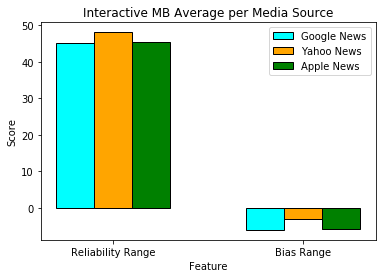

In [40]:
x = np.arange(2)
# y1 = [np.nanmean(data_google.column('Reliability Range')),
#       np.nanmean(data_yahoo.column('Reliability Range')),
#       np.nanmean(data_apple.column('Reliability Range'))]
# y2 = [np.nanmean(data_google.column('Bias Range')),
#       np.nanmean(data_yahoo.column('Bias Range')),
#       np.nanmean(data_apple.column('Bias Range'))]

y1 = [np.nanmean(data_google.column('Reliability Range')),
      np.nanmean(data_google.column('Bias Range'))]
y2 = [np.nanmean(data_yahoo.column('Reliability Range')),
      np.nanmean(data_yahoo.column('Bias Range'))]
y3 = [np.nanmean(data_apple.column('Reliability Range')),
      np.nanmean(data_apple.column('Bias Range'))]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Reliability Range','Bias Range'])
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title('Interactive MB Average per Media Source')
plt.legend(["Google News", "Yahoo News", "Apple News"])
plt.show()

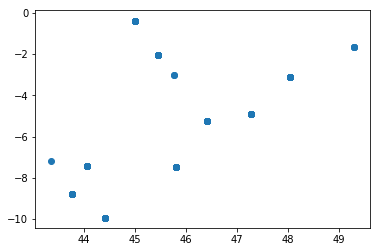

In [35]:
reliability_google = data_google.column('Reliability Range')
reliability_google = reliability_google[~np.isnan(reliability_google)]
bias_google = data_google.column('Bias Range')
bias_google = bias_google[~np.isnan(bias_google)]

plt.scatter(reliability_google,bias_google)

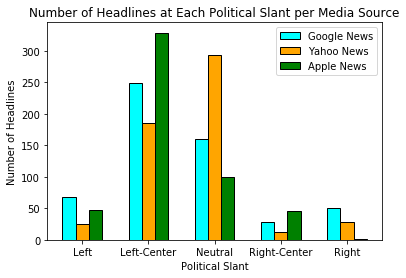

In [43]:
x = np.arange(5)

y1 = [68,249,160,29,51] # numbers for google news
y2 = [25,185,294,12,29] # numbers for yahoo news
y3 = [48,329,100,46,2] # numbers for apple news
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Left','Left-Center','Neutral','Right-Center','Right'])
plt.xlabel("Political Slant")
plt.ylabel("Number of Headlines")
plt.title('Number of Headlines at Each Political Slant per Media Source')
plt.legend(["Google News", "Yahoo News", "Apple News"])
plt.show()

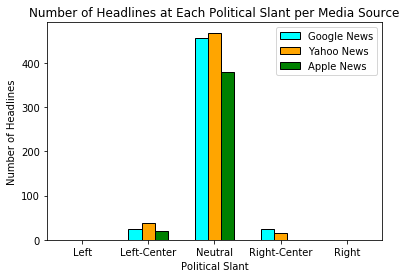

In [39]:
x = np.arange(5)

y1 = [0,24,456,25,0] # numbers for google news
y2 = [0,37,469,15,0] # numbers for yahoo news
y3 = [0,19,379,0,0] # numbers for apple news
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Left','Left-Center','Neutral','Right-Center','Right'])
plt.xlabel("Political Slant")
plt.ylabel("Number of Headlines")
plt.title('Number of Headlines at Each Political Slant per Media Source')
plt.legend(["Google News", "Yahoo News", "Apple News"])
plt.show()

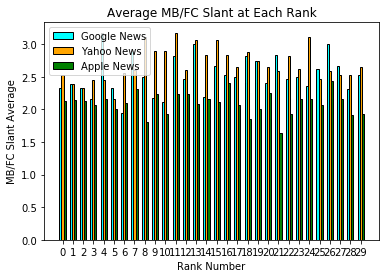

In [72]:
google_ranked = data_google.group('Rank Number',np.average).select('Rank Number','New MB/FC Slant average','Bipartisan Press Bias (float) average')
yahoo_ranked = data_yahoo.group('Rank Number',np.average).select('Rank Number','New MB/FC Slant average','Bipartisan Press Bias (float) average')
apple_ranked = data_apple.group('Rank Number',np.average).select('Rank Number','New MB/FC Slant average','Bipartisan Press Bias (float) average')
all_ranked = google_ranked.join('Rank Number',yahoo_ranked,'Rank Number').join('Rank Number',apple_ranked,'Rank Number')
all_ranked

x = np.arange(30)

y1 = all_ranked.column(1)#,all_ranked.column(2)] # numbers for google news
y2 = all_ranked.column(3)#,all_ranked.column(4)] # numbers for yahoo news
y3 = all_ranked.column(5)#,all_ranked.column(6)] # numbers for apple news
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, range(30))
plt.xlabel("Rank Number")#,"Bipartisan Press Bias Average")
plt.ylabel("MB/FC Slant Average")
plt.title('Average MB/FC Slant at Each Rank')
plt.legend(["Google News", "Yahoo News", "Apple News"])
plt.show()

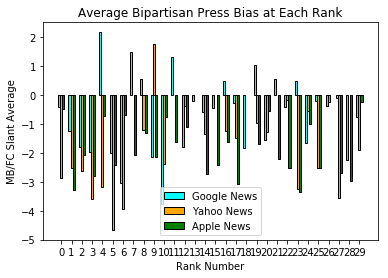

In [146]:
x = np.arange(30)

y1 = all_ranked.column(2)#,all_ranked.column(2)] # numbers for google news
y2 = all_ranked.column(4)#,all_ranked.column(4)] # numbers for yahoo news
y3 = all_ranked.column(6)#,all_ranked.column(6)] # numbers for apple news
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, range(30))
plt.xlabel("Rank Number")#,"Bipartisan Press Bias Average")
plt.ylabel("MB/FC Slant Average")
plt.title('Average Bipartisan Press Bias at Each Rank')
plt.legend(["Google News", "Yahoo News", "Apple News"])
plt.show()

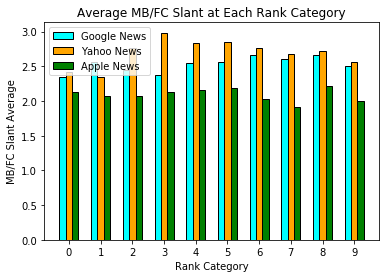

In [163]:
all_ranked = all_ranked.with_column('Rank Category',[1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10])
all_ranked_grouped = all_ranked.group('Rank Category',np.average)
all_ranked_grouped

x = np.arange(10)

y1 = all_ranked_grouped.column(2)#,all_ranked.column(2)] # numbers for google news
y2 = all_ranked_grouped.column(4)#,all_ranked.column(4)] # numbers for yahoo news
y3 = all_ranked_grouped.column(6)#,all_ranked.column(6)] # numbers for apple news
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, range(30))
plt.xlabel("Rank Category")#,"Bipartisan Press Bias Average")
plt.ylabel("MB/FC Slant Average")
plt.title('Average MB/FC Slant at Each Rank Category')
plt.legend(["Google News", "Yahoo News", "Apple News"])
plt.show()

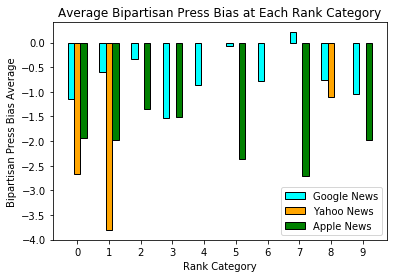

In [165]:
x = np.arange(10)

y1 = all_ranked_grouped.column(3)#,all_ranked.column(2)] # numbers for google news
y2 = all_ranked_grouped.column(5)#,all_ranked.column(4)] # numbers for yahoo news
y3 = all_ranked_grouped.column(7)#,all_ranked.column(6)] # numbers for apple news
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, range(30))
plt.xlabel("Rank Category")#,"Bipartisan Press Bias Average")
plt.ylabel("Bipartisan Press Bias Average")
plt.title('Average Bipartisan Press Bias at Each Rank Category')
plt.legend(["Google News", "Yahoo News", "Apple News"])
plt.show()

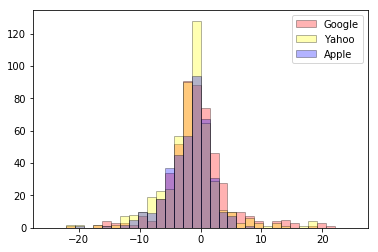

In [113]:
bins = np.linspace(-25,25,35)
#[-42,-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,42]
g = data_google.column('Bipartisan Press Bias (float)')
y = data_yahoo.column('Bipartisan Press Bias (float)')
a = data_apple.column('Bipartisan Press Bias (float)')

plt.hist(g,bins,alpha=0.3,label='Google',color='red')
plt.hist(y,bins,alpha=0.3,label='Yahoo',color='yellow')
plt.hist(a,bins,alpha=0.3,label='Apple',color='blue')
plt.legend(loc='upper right')

#plt.hist(data_google.column('Bipartisan Press Bias (float)'),bins,histtype='bar')

(array([ 0.,  0.,  1.,  0.,  0.,  2.,  4.,  3.,  3.,  2.,  7.,  4., 18.,
        34., 52., 91., 88., 74., 46., 28., 10., 10.,  7.,  4.,  0.,  4.,
         5.,  3.,  0.,  1.,  3.,  1.,  0.,  0.]),
 array([-25.        , -23.52941176, -22.05882353, -20.58823529,
        -19.11764706, -17.64705882, -16.17647059, -14.70588235,
        -13.23529412, -11.76470588, -10.29411765,  -8.82352941,
         -7.35294118,  -5.88235294,  -4.41176471,  -2.94117647,
         -1.47058824,   0.        ,   1.47058824,   2.94117647,
          4.41176471,   5.88235294,   7.35294118,   8.82352941,
         10.29411765,  11.76470588,  13.23529412,  14.70588235,
         16.17647059,  17.64705882,  19.11764706,  20.58823529,
         22.05882353,  23.52941176,  25.        ]),
 <a list of 34 Patch objects>)

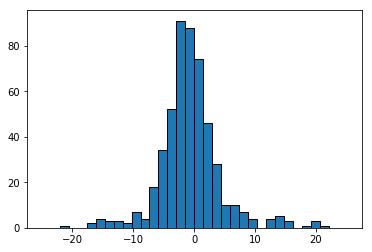

In [117]:
plt.hist(data_google.column('Bipartisan Press Bias (float)'),bins)

(array([  0.,   0.,   2.,   2.,   0.,   2.,   1.,   2.,   7.,   8.,  10.,
         19.,  23.,  24.,  57.,  90., 128.,  65.,  29.,  11.,  10.,   3.,
          6.,   3.,   1.,   3.,   1.,   0.,   1.,   4.,   0.,   0.,   0.,
          0.]), array([-25.        , -23.52941176, -22.05882353, -20.58823529,
        -19.11764706, -17.64705882, -16.17647059, -14.70588235,
        -13.23529412, -11.76470588, -10.29411765,  -8.82352941,
         -7.35294118,  -5.88235294,  -4.41176471,  -2.94117647,
         -1.47058824,   0.        ,   1.47058824,   2.94117647,
          4.41176471,   5.88235294,   7.35294118,   8.82352941,
         10.29411765,  11.76470588,  13.23529412,  14.70588235,
         16.17647059,  17.64705882,  19.11764706,  20.58823529,
         22.05882353,  23.52941176,  25.        ]), <a list of 34 Patch objects>)

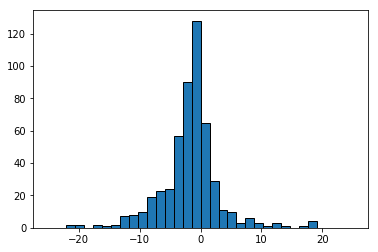

In [116]:
plt.hist(data_yahoo.column('Bipartisan Press Bias (float)'),bins)

(array([ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  5., 10.,  9., 18.,
        37., 45., 57., 94., 67., 31., 10.,  7.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-25.        , -23.52941176, -22.05882353, -20.58823529,
        -19.11764706, -17.64705882, -16.17647059, -14.70588235,
        -13.23529412, -11.76470588, -10.29411765,  -8.82352941,
         -7.35294118,  -5.88235294,  -4.41176471,  -2.94117647,
         -1.47058824,   0.        ,   1.47058824,   2.94117647,
          4.41176471,   5.88235294,   7.35294118,   8.82352941,
         10.29411765,  11.76470588,  13.23529412,  14.70588235,
         16.17647059,  17.64705882,  19.11764706,  20.58823529,
         22.05882353,  23.52941176,  25.        ]),
 <a list of 34 Patch objects>)

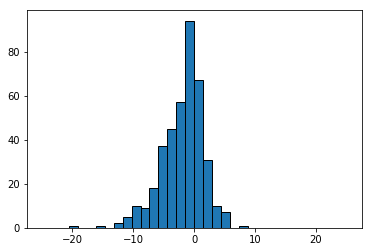

In [115]:
plt.hist(data_apple.column('Bipartisan Press Bias (float)'),bins)